In [1]:
import numpy as np

In [2]:
# Floating Point Calculations

In [3]:
# functions to calculate max number, min number, eps and how many numbers can be represented by a system
# takes parameters b,t,L,U where b stands for beta


# GUIDE - NOT FULLY ACCURATE
def numberSystemInfo(b,t,L,U):
    
    print(f"---------\nFor Number System ({b},{t},{L},{U}):\n")
    
    # calculate number of numbers representable
    total = 2 * (U-L+1) * (b-1)
    
    for i in range(t-1):
        total *= b
        
    total += 2
    
    print(f"Number of numbers representable = {total}")
    
    # calculate largest number
    largestVal = 0
    mult = b**(U-1)
    
    for i in range(t):
        largestVal += (b-1) * mult
        mult /= b
        
    print(f"The largest representable value is {largestVal:.6}")
        
    # calculate closest postive number to zero
    smallVal = b**(L-1)
    print(f"The smallest value representable is {smallVal}")
    
    # calculate epilson of the number system
    
    eps = 0.5 * b ** (1 - t)
    print(f"The machine epilison, {eps = }")


In [4]:
# test numberSystemInfo

#numberSystemInfo(10,2,-1,2)
#numberSystemInfo(2,23,-127,128)
numberSystemInfo(2,52,-1023,1024)


---------
For Number System (2,52,-1023,1024):

Number of numbers representable = 9223372036854775810
The largest representable value is 1.79769e+308
The smallest value representable is 5.562684646268003e-309
The machine epilison, eps = 2.220446049250313e-16


In [5]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [6]:
# Gaussian Elemination

In [7]:
# ALGORITHM TO SOLVE AN UPPER TRIANGULAR MATRIX

# takes A in upper triangular form, along with b, to solve for x, returning x
def solveUpperTri(A,b):
    
    # find the dimensions of the triangular system - A should be sqaure
    dim = A.shape[0]
    
    x = np.zeros(dim)
    
    # start at bottom row of matrix and work up
    for i in range(dim-1,-1,-1):
        
        # find rowSum as the total of values not along diag * corresponding x val
        rowSum = 0
        for j in range(i+1,dim):
            rowSum += A[i][j] * x[j]
        
        x[i] = (b[i] - (rowSum))/A[i][i]
        
    return x 

In [8]:
# Can preform GE with pivoting if necessary - to do this, uncomment pivoting line

# take parameters A and b and return x (Ax = b)
def gE(A,b):
    
    # get the size of A
    numRows = A.shape[0]
    numCols = A.shape[1]
    
    # loop through rows
    for x in range(numRows):
        
        #print(f"before pivot on row {x}\n\n{A = }\n{b = }\n")
        
        #preform a pivot - UNCOMMENT TO USE PIVOTTING
        #A,b = pivot(A,b,x)
        
        #print(f"after pivot on row {x}\n\n{A = }\n{b = }\n--------------------------------\n")
        
        # get the index along the diagonal
        diag = A[x][x]
        # iterate through remaining rows
        for i in range(x+1,numRows):
            factor = A[i][x] / diag
            # iterate through each column from x and do the subtraction
            for j in range(x,numCols):
                A[i][j] = A[i][j] - factor * A[x][j]
                
            # update b
            b[i] = b[i] - factor * b[x]
                
    return A,b       


#function to pivot at a specfic given column
def pivot(A,b,i):
    dim = A.shape[0]
    
    #find the row with the biggest val in the column denoted by i
    maxValRow = i
    for j in range(i+1,dim):
        if A[j][i] > A[maxValRow][i]:
            maxValRow = j
        
            
    #pivot unless no need to (i.e. if maxValRow == i)
    if (maxValRow != i):
        temp1 = A[maxValRow].copy()
        A[maxValRow] = A[i]
        A[i] = temp1
        
        temp2 = b[maxValRow].copy()
        b[maxValRow] = b[i]
        b[i] = temp2
        
    return(A,b)

In [9]:
# example

A = np.array([[4.0,3.0,2.0,1.0],[1.0,2.0,2.0,2.0],[1.0,1.0,3.0,0.0],[2.0,1.0,2.0,3.0]])
b = np.array([10.0,7.0,5.0,8.0])

A1 = np.array([[0.0,1.0,0.0],[1.0,1.001,1.0],[100.0,100.0,0.0]])
b1 = np.array([0.0,1002.0,200.0])

A,b = gE(A,b)

solveUpperTri(A,b)

array([1., 1., 1., 1.])

///////////////////////

About GE:
- Time complexity of O(n^3)
- IF Aii is 0 and all rows below it in col i have 0 as well, then the algorithm, even with pivoting, breaks down
- Subject to rounding errors, where big - small may not have desired effect


In [10]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [11]:
# LU Factorisation

In [12]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [13]:
# Jacobi Iteration

In [14]:
# takes A and b as parameters along with an initial x guess - A should be square and its - number of iteration
def jacobi(A,b,x,its):
    # find dimension of A
    dim = A.shape[0]
    
    
    for i in range(its):
    
        # find D^-1
        Dinverse = np.zeros((dim,dim))

        for i in range(dim):
            for j in range(dim):
                if i == j:
                    Dinverse[i][j] = 1/A[i][j]

        # find the next x

        x = x + Dinverse @ (b - A @ x)
    
    return x


In [15]:
# example

A = np.array([[2.0,1.0],[-1.0,4.0]])
b = np.array([3.5,0.5])
x = np.array([1,1])

jacobi(A,b,x,2)

array([1.5625, 0.4375])

In [16]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [17]:
# Gauss-Seidel Iteration

In [18]:
# Gauss-Seidel Function, taking A,b and x0 and its (number of iterations) as parameters
def GS(A,b,x,its):
    
    n = x.shape[0]
    
    for it in range(its):
        for i in range(n):

            sum1 = 0

            for j in range(n):
                sum1 += A[i][j] * x[j]
                
            x[i] += (1/A[i][i])*(b[i] - sum1)

        #print(f"{x = }")
    
    return x
        

In [19]:
# Example

A = np.array([[2.0,1.0,3.0],[1.0,3.0,1.0],[0.0,1.0,2.0]])
b = np.array([6.0,10.0,6.0])
x = np.array([1.0,2.0,3.0])

xFinal = GS(A,b,x,20)

print(f"{xFinal = } | {A @ xFinal = }")

xFinal = array([-0.72727273,  3.09090909,  1.45454545]) | A @ xFinal = array([ 6., 10.,  6.])


In [20]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [21]:
# Euler's Method [  x(t1) = x(t0) + dt * x'(t0)      ])

In [22]:
# implement f'(x) as ff(x)
def ff(x,t):
    return -(x**2) + 1/t

In [23]:
# takes inital x0, dt, t0 and number of iterations to perfrom
def eulerMethod(x0,dt,t0,its):
    
    t = [0.0 for i in range(its+1)]
    x = [0.0 for i in range(its+1)]
    
    t[0] = t0
    x[0] = x0

    for i in range(1,its+1):
        x[i] = x[i-1] + ff(x[i-1],t[i-1])*dt
        t[i] = t[i-1] + dt
        
        print(f"t[i] = {t[i]:.4f} | x[i] = {x[i]:.4f}")
        
    return(t[-1],x[-1])
        

In [24]:
# example - using f'(x) = -y^2 + 1/t
# dt = 1/3
# t0 = 1
# tEnd = 2
# tSteps = 3
# y(1) = 2

eulerMethod(2,1/3,1,3)

t[i] = 1.3333 | x[i] = 1.0000
t[i] = 1.6667 | x[i] = 0.9167
t[i] = 2.0000 | x[i] = 0.8366


(1.9999999999999998, 0.8365740740740741)

In [25]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [26]:
# Midpoint method

In [27]:
# takes inital x0, dt, t0 and number of iterations to perfrom
def midpointMethod(x0,dt,t0,its):
    
    t = [0.0 for i in range(its+1)]
    x = [0.0 for i in range(its+1)]
    
    t[0] = t0
    x[0] = x0

    for i in range(1,its+1):
        
        tMid, xMid = eulerMethod(x[i-1],dt/2, t[i-1],1)
        
        #print(f"{tMid = } | {xMid = }")
        
        x[i] = x[i-1] + ff(xMid,tMid)*dt
        t[i] = t[i-1] + dt
        
        #print(f"t[i] = {t[i]:.4f} | x[i] = {x[i]:.4f}")
        
    return(t[-1],x[-1])

In [28]:
# example - using f'(x) = -y^2 + 1/t
# dt = 1/3
# t0 = 1
# tEnd = 2
# tSteps = 3
# y(1) = 2

midpointMethod(2,1/3,1,2)

t[i] = 1.1667 | x[i] = 1.5000
t[i] = 1.5000 | x[i] = 1.2676


(1.6666666666666665, 1.222295599610309)

In [29]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [30]:
# Non Linear Solvers

# First setting up some template functions


# f(x) maps to y = x^2 - 5
def f(x):
    return x**2 - 5

# ff(x) maps to derative of f(x) - 2x
def ff(x):
    return 2*x


def f1(x):
    pass

def f2(x):
    pass

def f3(x):
    pass

In [31]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [32]:
# Bisection Method

In [33]:
# takes initial bracket of x1,x2 and tolerance to find a solution to
def bisectionMethod(x1,x2,tol = 0.0000000001):
    
    fx1 = f(x1)
    fx2 = f(x2)
    
    # first ensure bracket is not postive - i.e. no solution in the interval
    if (fx1 * fx2) >= 0:
        return (f"With current bracket, no solution exist in its interval - current bracket = ({x1},{x2})")
        
    
    while abs(x2-x1) > tol:
        
        mid = (x1+x2)/2
        fMid = f(mid)
        
        #print(f"{x1 = } | {x2 = } | {mid = }")
        #input()
        
        if (fx1 * fMid) > 0:
            #print("mid below solution")
            x1 = mid
            fx1 = fMid
        else:
            #print("mid above solution")
            x2 = mid
            fx2 = fMid
        
        #print("")
            
    return x1

In [34]:
print(bisectionMethod(1.5,3.4))

2.236067977474886


In [35]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [36]:
# Newtons method

In [37]:
# requires an initial iterate, x and a tolerance, tol
def newtonsMethod(x,tol = 0.00001):
    
    fx = f(x)
    
    while abs(fx) > tol:
        
        x = x - fx/ff(x)
        
        fx = f(x)
        
        #print(f"{x = } | {fx = }")
        #input()
        
    return x

In [38]:
print(newtonsMethod(1))

2.2360688956433634


In [39]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [40]:
# Quasi-Newton method

In [41]:
# default dx to sqrt of machine epsilon
def modifiedNewton(x,dx = (np.finfo(float).eps)**0.5 ,tol = 0.0000001):
    
    fx = f(x)
    
    while abs(fx) > tol:
        
        # predict f'(x)
        ffx = (f(x+dx) - fx)/dx
        
        # update x
        x = x - fx/ffx
        
        # update fx
        fx = f(x)
        
    return x

In [42]:
print(modifiedNewton(1))

2.2360679774999817


In [43]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [44]:
# Secant Method - requires two inital values (x1 and x2)
def secantMethod(x0,x1,tol = 0.000001):
    
    fx0 = f(x0)
    fx1 = f(x1)
    
    while abs(fx1) > tol:
        
        x2 = x1 - (fx1*(x1-x0))/(fx1 - fx0)
        
        # update values
        x0 = x1
        x1 = x2
        
        fx0 = fx1
        fx1 = f(x1)
        
    return x1

In [45]:
print(secantMethod(1,6))

2.2360680543591553


In [46]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [47]:
# approx a best fit line of any dimension

In [48]:
# plots graph of approxBestFit

import matplotlib.pyplot as plt

def plotGraph(mat,coordinates):
    xs = [x[0] for x in coordinates]
    ys = [x[1] for x in coordinates]
    
    # find x interval to plot the graph
    xx = [x for x in np.arange(min(xs)-1,max(xs)+1,0.05)]
    # calculate y coors for each x val
    #yy = [quad[0] + x * quad[1] + x**2 * quad[2] for x in xx]
    yy = []
    
    
    for x in xx:
        y = 0
        
        for i in range(len(mat)):
            y +=  x**i * mat[i]
            
        yy.append(y)
            
    plt.figure(3)
    plt.scatter(xs, ys)
    plt.plot(xx,yy)
    plt.xlabel("time")
    plt.ylabel("y")
    plt.grid()
    plt.show()

In [49]:
# takes a series of cooridnates in form [(x0,y0),(x1,y1),(x2,y2),(x3,y3),...] as coors
# takes a dimension (1 = linear, 2 = quadratic, 3 = cubic)
def approxBestFit(coors,dim):
    
    # get Number of coors
    n = len(coors)
    
    # set up matrices
    b = np.zeros(n)
    A = np.zeros((n,dim+1))
    
    # set up b and A
    for i in range(n):
        b[i] = coors[i][1]
        
        A[i][0] = 1
        
        for j in range(1,dim+1):
            A[i][j] = coors[i][0] ** j
            
    AtA = np.transpose(A) @ A
    Atb = np.transpose(A) @ b
    
    # find x
    x = np.linalg.solve(AtA, Atb)
    
    # plot graph
    plotGraph(x,coors)
    
    #print(f"{b = }\n\n{A = }\n\n{AtA = }\n\n{Atb = }\n\n{x = }")
    return x

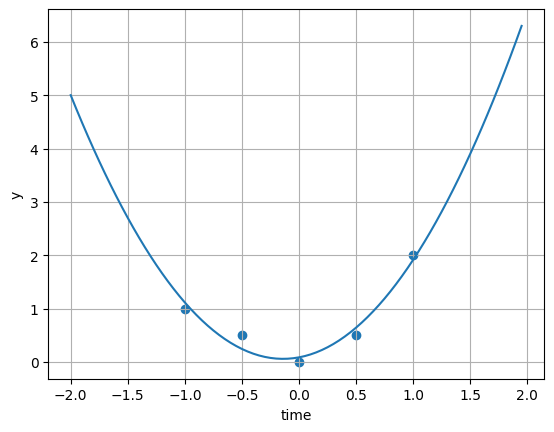

array([0.08571429, 0.4       , 1.42857143])

In [50]:
# test approxBestFit

coors = [(-1.0,1.0),(-0.5,0.5),(0.0,0.0),(0.5,0.5),(1.0,2.0)]
approxBestFit(coors,2)

In [51]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [52]:
'''
To ADD:

--> Robust Linear Solvers
--> Descriptions of each algorithm, including advantages and disadvatages, along with uses
--> Sparse Matrices
--> Final lecture

'''

'\nTo ADD:\n\n--> Robust Linear Solvers\n--> Descriptions of each algorithm, including advantages and disadvatages, along with uses\n--> Sparse Matrices\n--> Final lecture\n\n'